<a href="https://colab.research.google.com/github/rubeshajith/Classification-Project/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [5]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Displaying first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Getting the shape of the dataset
df.shape

(2000, 21)

In [7]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','m_dep':'mobile_depth','pc':'rear_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [10]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam_pix  2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_depth   2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  rear_cam_pix   2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  screen_height  2000 non-null   int64  
 15  screen_width   2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
# Checking for null values
df.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam_pix    0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
rear_cam_pix     0
px_height        0
px_width         0
ram              0
screen_height    0
screen_width     0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

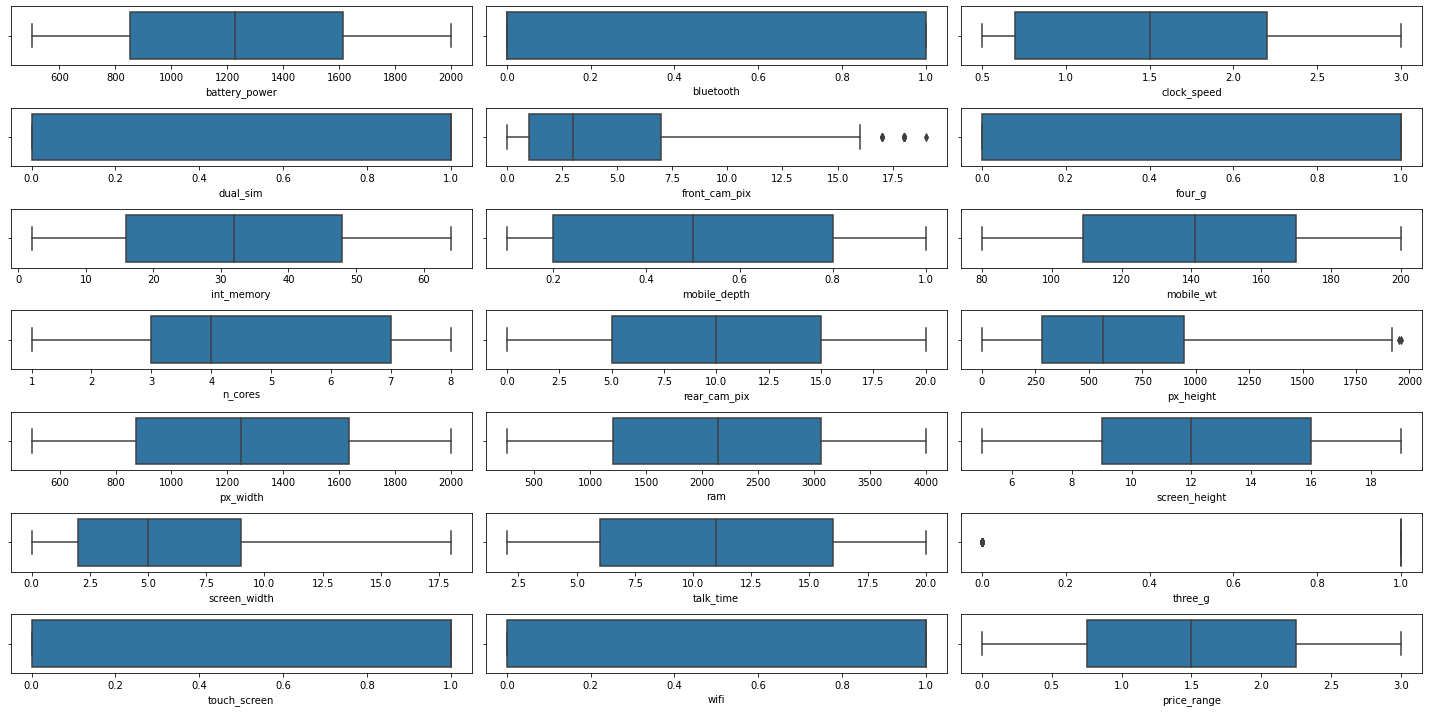

In [13]:
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [14]:
df.front_cam_pix.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_cam_pix, dtype: int64

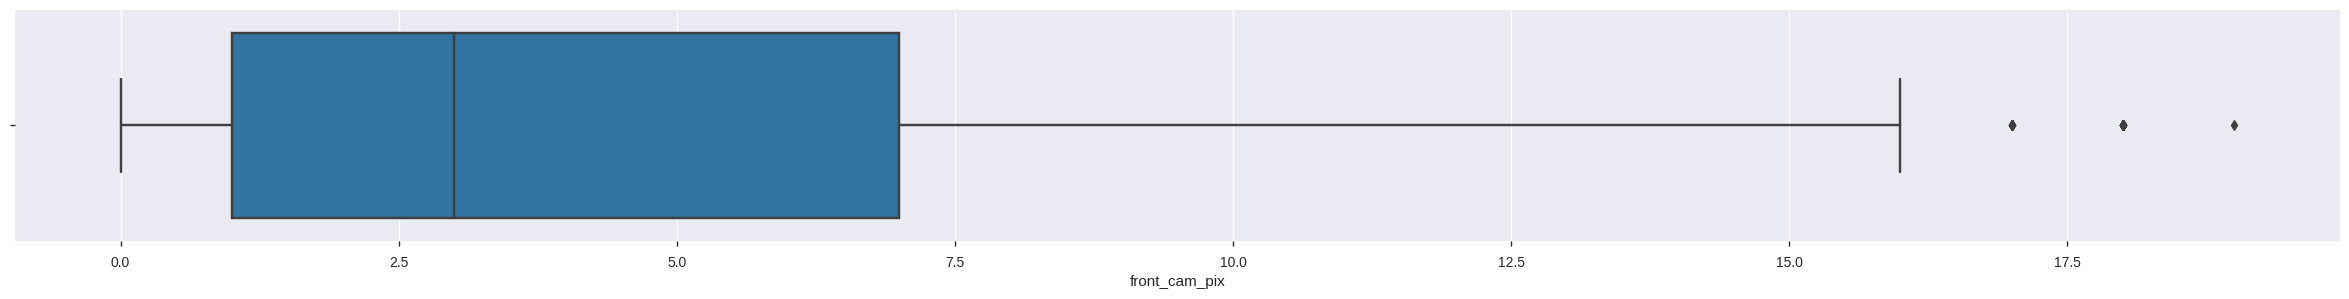

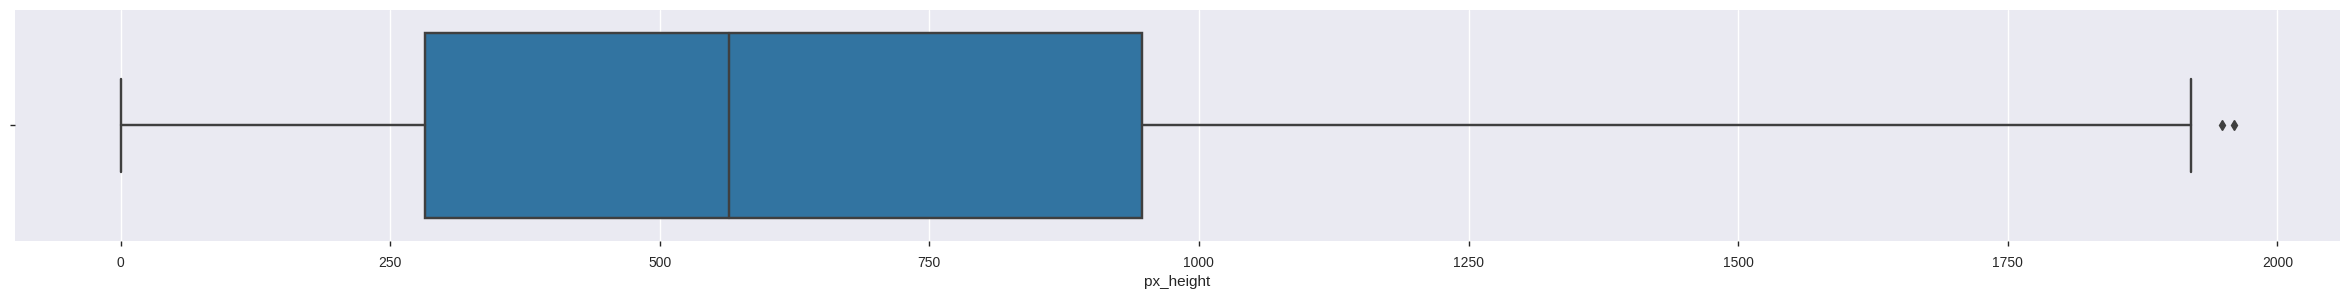

In [55]:
# plotting seperate box_plots which detected outliers
plt.figure(figsize = (30,3))
sns.boxplot(df.front_cam_pix)
plt.figure(figsize = (30,3))
sns.boxplot(df.px_height)


In [65]:
df.front_cam_pix.value_counts(ascending= True).loc[lambda x :x <= 11].to_frame()

,front_cam_pix
19,1
17,6
18,11


In [56]:
df.px_height.sort_values(ascending= False)[:2].to_frame()

,px_height
1771,1960
988,1949


Above printed dataframes are the outliers which were detected by box_plot. i.e, Front camerea pixels with 19MP has count of one, 17MP has count of six and 18MP with eleven counts so total of 18 rows 

Pixel height have two outlier which were detected by boxplot 

So 20 outlier rows which is nearly 1% of data in our datset 

We're implementing Lostic Regression too and they follows similar assumptions of Linear Regression

Logistic Regression suffers of extreme outliers, We aren't removing this outliers, they are not extreme to do so.

In [74]:
# Interpreting our DataFrame Statistically
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From the above describe method we can see variables with have 0 values which is unlikely for few columns namely pixel_height and screen_width.

In [84]:
df[df.px_height == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range


Since they are continous variables, and also similar pixel width doesn't have similar pixel height so we're replacing zero values to there means with respect to price classes

In [79]:
df["px_height"] = df["px_height"].replace(0, np.nan)

In [83]:
df["px_height"] = df["px_height"].fillna(np.ceil(df.groupby("price_range")["px_height"].transform("mean")))

In [91]:
df.price_range[df['screen_width'] == 0].value_counts().to_frame()

,price_range
0,49
1,48
2,44
3,39


In [ ]:
df.groupby('price_range')['px_height'].mean()

price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64

In [ ]:
np.ceil(df.groupby('price_range')['px_height'].median())

price_range
0    466.0
1    606.0
2    539.0
3    674.0
Name: px_height, dtype: float64